# 1. Import Libraries

In [5]:
## Importing all the required libraries

import cv2     # for capturing videos
import os
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images
from sklearn.model_selection import train_test_split
from glob import glob
from tqdm import tqdm

import keras
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report


# 2.a. Video-to-Image Data Preparation (Train)

In [ ]:
######################  Declaring Directory to store data  ########################################

## Change your current working directory to your desired working directory where you 
## would want to store all the frames of video samples.
## Ensure that the directory has atleast 30 GB of empty disk space

os.chdir('desired_directory_for_video_frames')

###################################################################################################


######################  Tracersing the Train Video Data directory  ################################

directory = r'root_directory_where_train_video_data_is_stored'
for sub_dir_1 in os.listdir(directory):

    for sub_dir_2 in os.listdir(os.path.join(directory, sub_dir_1)):
        
        if str(sub_dir_2) in ['glasses', 'night_noglasses', 'nightglasses', 'noglasses', 'sunglasses']:
#             print(sub_dir_1, sub_dir_2)

            for files in os.listdir(os.path.join(os.path.join(directory, sub_dir_1), sub_dir_2)):
        
                if str(files) in  ['nonsleepyCombination.avi', 'sleepyCombination.avi', 'slowBlinkWithNodding.avi', 'yawning.avi']:
                    
                    ############ Opening text files to label each frame #################
                    txt_file = str(directory) + '\\' + str(sub_dir_1) + '\\' + str(sub_dir_2) + '\\' + str(sub_dir_1) + '_' + str(files[:-4]) + '_drowsiness.txt'
                    file = open(txt_file, 'r') 
                    n = 0
                    temp = []
                    while True: 

                        # read by character 
                        char = file.read(1)           
                        if not char:  
                            break
                        n = n+1
                        #print(char)
                        temp.append(char)

                    file.close()
    
###################################################################################################

######################  Preparing frames from the videos  #########################################

                    # Read the video from specified path 
                    cam = cv2.VideoCapture(str(directory) + '\\' + str(sub_dir_1) + '\\' + str(sub_dir_2) + '\\' + files) 
                        
#                     try: 

#                         # creating a folder named data 
#                         if not os.path.exists('data'): 
#                             os.makedirs('data') 

#                     # if not created then raise error 
#                     except OSError: 
#                         print ('Error: Creating directory of data') 

                    # frame 
                    currentframe = 0

                    while(True): 

                        # reading from frame 
                        ret,frame = cam.read() 
                        if ret: 
                            # if video is still left continue creating images 
                            if temp[currentframe] == '1':
                                # creating a folder named data 
                                if not os.path.exists('train_data/drowsy'): 
                                    os.makedirs('train_data/drowsy')
                                name = './train_data/drowsy/' + str(sub_dir_1) + '_' + str(sub_dir_2) + '_' + str(files[:-4]) + '_' +str(currentframe) + '_' + 'drowsy' + '.jpg'
                            
                            if temp[currentframe] == '0':
                                # creating a folder named data 
                                if not os.path.exists('train_data/notdrowsy'): 
                                    os.makedirs('train_data/notdrowsy')
                                name = './train_data/notdrowsy/' + str(sub_dir_1) + '_' + str(sub_dir_2) + '_' + str(files[:-4]) + '_' +str(currentframe) + '_' + 'notdrowsy' + '.jpg'
                                
                            print ('Creating...' + name) 
                            cv2.imwrite(name, frame) 

                            # increasing counter so that it will 
                            # show how many frames are created 
                            currentframe += 1
                        else: 
                            break

                    # Release all space and windows once done 
                    cam.release() 
                    cv2.destroyAllWindows() 
                    
###################################################################################################

# 2.b. Video-to-Image Data Preparation (Test)

In [ ]:
######################  Tracersing the Test Video Data directory  ######################################

directory = r'root_directory_where_test_video_data_is_stored'
for sub_dir_1 in os.listdir(directory):

    for files in os.listdir(os.path.join(directory, sub_dir_1)):
        
        if str(files) in  [sub_dir_1+'_'+'glasses_mix.mp4', sub_dir_1+'_'+'nightglasses_mix.mp4', 
                           sub_dir_1+'_'+'nightnoglasses_mix.mp4', sub_dir_1+'_'+'noglasses_mix.mp4', sub_dir_1+'_'+'sunglasses_mix.mp4']:
            
            
            ############ Opening text files to label each frame #################
            
            txt_file = str(directory) + '\\' + str(sub_dir_1) + '\\' + str(files[:-4]) + 'ing_drowsiness.txt'
            file = open(txt_file, 'r') 
            n = 0
            temp = []
            while True: 

                # read by character 
                char = file.read(1)           
                if not char:  
                    break
                n = n+1
                #print(char)
                temp.append(char)
#                     print(str(sub_dir_1) + sub_dir_2 + '_' + str(files[:-4]) + '_drowsiness.txt')
#                     print(n)
#                     print()

            file.close()

###################################################################################################

######################  Preparing frames from the videos  #########################################

            # Read the video from specified path 
            cam = cv2.VideoCapture(str(directory) + '\\' + str(sub_dir_1) + '\\' + files) 

#                     try: 

#                         # creating a folder named data 
#                         if not os.path.exists('data'): 
#                             os.makedirs('data') 

#                     # if not created then raise error 
#                     except OSError: 
#                         print ('Error: Creating directory of data') 

            # frame 
            currentframe = 0

            while(True): 

                # reading from frame 
                ret,frame = cam.read() 
                if ret: 
                    # if video is still left continue creating images 
                    if temp[currentframe] == '1':
                        # creating a folder named data 
                        if not os.path.exists('val_data/drowsy'): 
                            os.makedirs('val_data/drowsy')
                        name = './val_data/drowsy/' + str(sub_dir_1) + '_' + str(files[:-4]) + '_' +str(currentframe) + '_' + 'drowsy' + '.jpg'

                    if temp[currentframe] == '0':
                        # creating a folder named data 
                        if not os.path.exists('val_data/notdrowsy'): 
                            os.makedirs('val_data/notdrowsy')
                        name = './val_data/notdrowsy/' + str(sub_dir_1) + '_' + str(files[:-4]) + '_' +str(currentframe) + '_' + 'notdrowsy' + '.jpg'

                    print ('Creating...' + name) 
                    cv2.imwrite(name, frame) 

                    # increasing counter so that it will 
                    # show how many frames are created 
                    currentframe += 1
                else: 
                    break

            # Release all space and windows once done 
            cam.release() 
            cv2.destroyAllWindows() 
            
###################################################################################################

# 3. Image Augmentation

In [2]:

datagen = ImageDataGenerator(
    
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
    
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
    
        horizontal_flip=True,
        fill_mode='nearest'
    
        )

In [3]:
# img = load_img('train_data/drowsy/001_glasses_sleepyCombination_974_drowsy.jpg')  # this is a PIL image
# x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
# x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# # the .flow() command below generates batches of randomly transformed images
# # and saves the results to the `preview/` directory
# i = 0
# for batch in datagen.flow(x, batch_size=1,
#                           save_to_dir='rand', save_prefix='drowsy', save_format='jpeg'):
#     i += 1
#     if i > 20:
#         break  # otherwise the generator would loop indefinitely

# 4. Baseline Model Preparation

In [33]:
model_1 = Sequential()
model_1.add(Conv2D(32, (3, 3), input_shape=(3, 224, 224), kernel_regularizer=l2(0.01)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model_1.add(Conv2D(32, (3, 3), padding='same', kernel_regularizer=l2(0.01)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model_1.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(0.01)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

# # the model so far outputs 3D feature maps (height, width, features)

In [ ]:
model_1.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model_1.add(Dense(64, kernel_regularizer=l2(0.01)))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(1, kernel_regularizer=l2(0.01)))
model_1.add(Activation('sigmoid'))

model_1.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [23]:
model_1.summary()

<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x00000206BC035080>>

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model_1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## 4.a. Training Baseline Model

In [ ]:
## Augmenting Test and Train Images ##
## with a flow generator ##

batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'train_data',  # this is the target directory
        target_size=(224, 224),  # all images will be resized to 224 x 224
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'val_data',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='binary')

In [ ]:
# callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history_1 = model_1.fit_generator(
        train_generator,
        steps_per_epoch= (train_generator.samples)/train_generator.batch_size,
        epochs=20,
        validation_data = validation_generator,
        validation_steps = (validation_generator.samples)/validation_generator.batch_size,
        #callbacks = [callback]
)

model_1.save_weights('model_1.h5')  # always save your weights after training or during training

## 4.b. Visualize Baseline Results

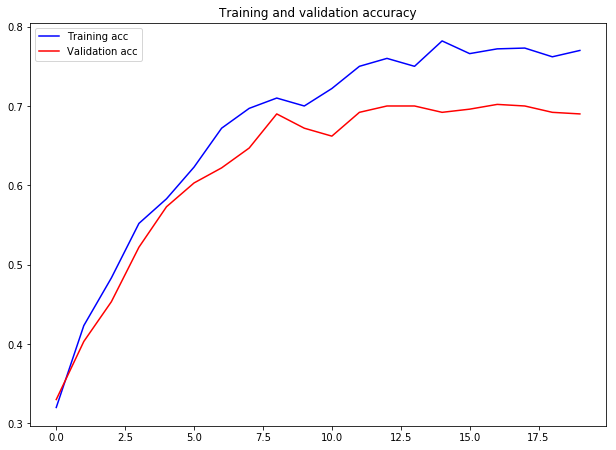

<Figure size 432x288 with 0 Axes>

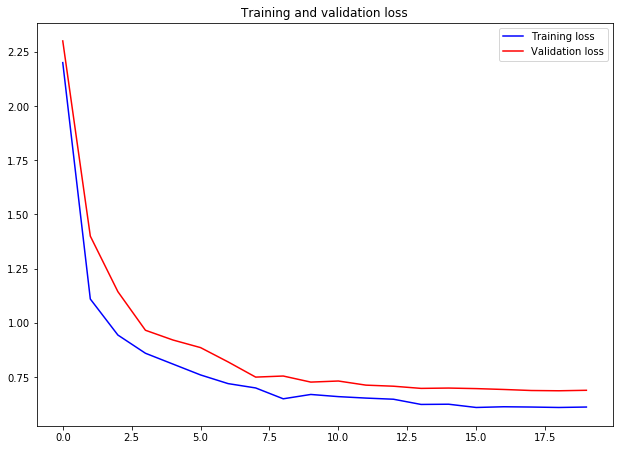

In [41]:
def visualize_results(history):
    # Plot the accuracy and loss curves
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
 
    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

    
# Run the function to illustrate accuracy and loss
visualize_results(history_1)


# 5. Final Model Prepapration (Fine-tuned with VGG-Imagenet)

In [36]:
# Initialize the VGG model

vgg = VGG16(
    include_top=False, weights='imagenet', input_tensor=None, input_shape= (150,150,3),
)

# Freeze all the layers
for layer in vgg.layers[:]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg.layers:
    print(layer, layer.trainable)
    


<keras.engine.input_layer.InputLayer object at 0x00000206BC5224E0> False
<keras.layers.convolutional.Conv2D object at 0x00000206BD5AEB70> False
<keras.layers.convolutional.Conv2D object at 0x00000206BC5226A0> False
<keras.layers.pooling.MaxPooling2D object at 0x00000206BD8CBE10> False
<keras.layers.convolutional.Conv2D object at 0x00000206BD8E5668> False
<keras.layers.convolutional.Conv2D object at 0x00000206BD927518> False
<keras.layers.pooling.MaxPooling2D object at 0x00000206BD93DE80> False
<keras.layers.convolutional.Conv2D object at 0x00000206BD93DEF0> False
<keras.layers.convolutional.Conv2D object at 0x00000206BD96AC50> False
<keras.layers.convolutional.Conv2D object at 0x00000206BD98F518> False
<keras.layers.pooling.MaxPooling2D object at 0x00000206BD9B2FD0> False
<keras.layers.convolutional.Conv2D object at 0x00000206BD9B2940> False
<keras.layers.convolutional.Conv2D object at 0x00000206BD9DE278> False
<keras.layers.convolutional.Conv2D object at 0x00000206BDA00B70> False
<ker

In [29]:

# Create the model
model_2 = Sequential()

# Add the vgg convolutional base model
model_2.add(vgg)
# for layer in vgg.layers[1:]:
#     model.add(layer)


# Add new layers
model_2.add(Flatten())
model_2.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model_2.add(Dropout(0.5))
model_2.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

# Show a summary of the model. Check the number of trainable parameters
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                524352    
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 65        
Total params: 15,239,105
Trainable params: 524,417
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
plot_model(model_2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


## 5.a. Training Final Model

In [ ]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'train_data',  # this is the target directory
        target_size=(224, 224),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'val_data',
        target_size=(224,224),
        batch_size=batch_size,
        class_mode='binary')

In [ ]:
# Configure the model for training
model_2.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Train the model
history_2 = model_2.fit(
      train_generator,
      steps_per_epoch=
         (train_generator.samples/100)/train_generator.batch_size,
      epochs=50,
      validation_data=validation_generator, 
      validation_steps=
         (validation_generator.samples/100)/validation_generator.batch_size,
      verbose=1)

## 5.b. Visualize Final Results

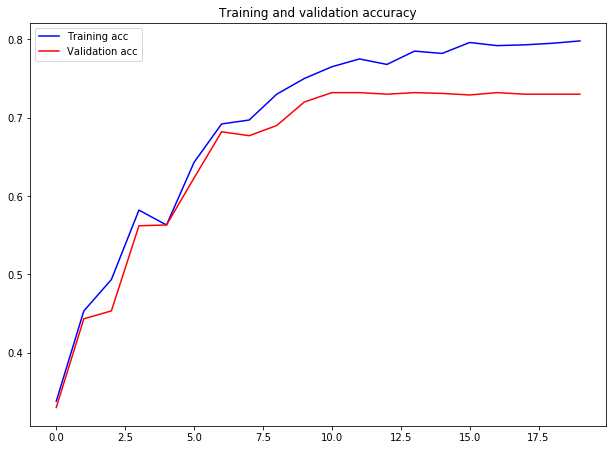

<Figure size 432x288 with 0 Axes>

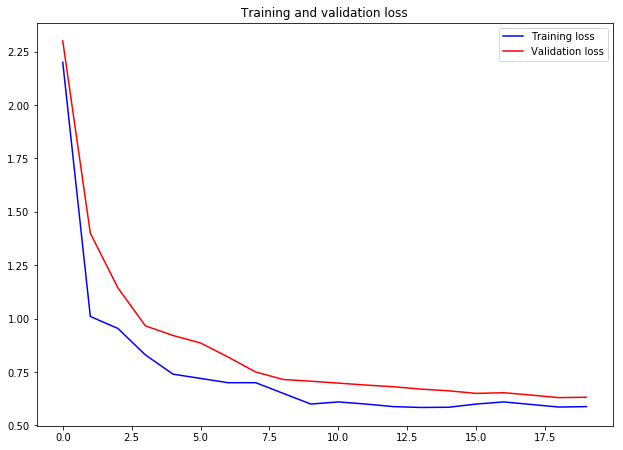

In [40]:
# Utility function for plotting of the model results
def visualize_results(history):
    # Plot the accuracy and loss curves
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()


# Run the function to illustrate accuracy and loss
visualize_results(history_2)

# AND THIS BRINGS US TO THE END !!